In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
np.random.seed(0)

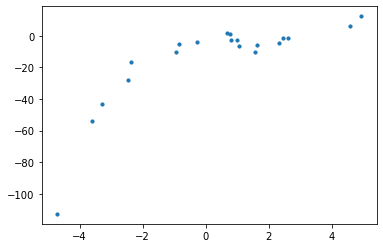

In [2]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
x.sort()
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
plt.scatter(x,y, s=10)
plt.show()

In [3]:
# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

In [4]:
#Fit a linear regression Model
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

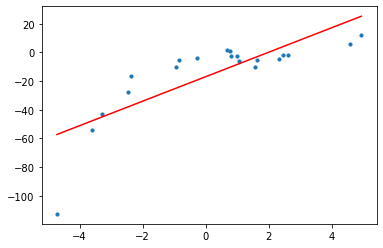

In [5]:
plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()

In [6]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y,y_pred))
print(rmse)

16.491675261330542


In [7]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)
x_poly

array([[ 1.        , -4.7226796 , 22.30370258],
       [ 1.        , -3.60267397, 12.97925974],
       [ 1.        , -3.29215704, 10.83829796],
       [ 1.        , -2.48223722,  6.16150161],
       [ 1.        , -2.36282052,  5.58292081],
       [ 1.        , -0.93621395,  0.87649656],
       [ 1.        , -0.85026525,  0.722951  ],
       [ 1.        , -0.28311318,  0.08015307],
       [ 1.        ,  0.6684103 ,  0.44677233],
       [ 1.        ,  0.76820449,  0.59013814],
       [ 1.        ,  0.79952837,  0.63924562],
       [ 1.        ,  0.99897702,  0.99795508],
       [ 1.        ,  1.0607969 ,  1.12529005],
       [ 1.        ,  1.56786929,  2.4582141 ],
       [ 1.        ,  1.63497495,  2.67314309],
       [ 1.        ,  2.30965656,  5.3345134 ],
       [ 1.        ,  2.45407162,  6.02246754],
       [ 1.        ,  2.61547479,  6.84070838],
       [ 1.        ,  4.56228722, 20.81446466],
       [ 1.        ,  4.93183364, 24.32298305]])

In [8]:
polymodel = LinearRegression()
polymodel.fit(x_poly, y)
y_poly_pred = polymodel.predict(x_poly)

In [9]:
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
print(rmse)

10.960190607855624


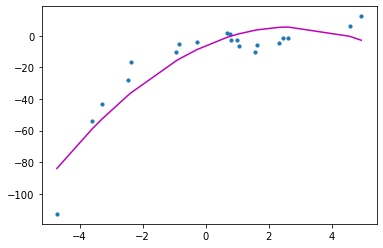

In [10]:
plt.scatter(x, y, s=10)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [11]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)
polymodel = LinearRegression()
polymodel.fit(x_poly, y)
y_poly_pred = polymodel.predict(x_poly)
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
print(rmse)

3.3447284009354283


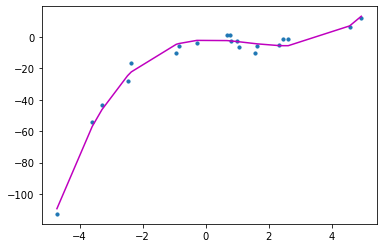

In [12]:
plt.scatter(x, y, s=10)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [13]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=10)
x_poly = polynomial_features.fit_transform(x)
polymodel = LinearRegression()
polymodel.fit(x_poly, y)
y_poly_pred = polymodel.predict(x_poly)
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
print(rmse)

2.1731828361864


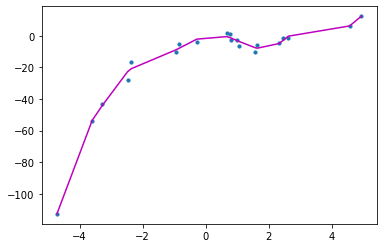

In [14]:
plt.scatter(x, y, s=10)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.5, random_state=1)

In [ ]:
def create_polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, Y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
  
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
    
  return (rmse_train,rmse_test,degree)

In [ ]:
a=[]
for i in range(1,6):
    print(i)
    a.append(create_polynomial_regression_model(i))

In [ ]:
df = pd.DataFrame(a,columns=['Training Error','Validation Error','Degree'])
df

In [ ]:
fig=plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(df['Degree'].values,df['Training Error'].values, label = 'Training Error')
ax.plot(df['Degree'].values,df['Validation Error'].values,label = 'Validation Error')
ax.set_xlabel('Degree')
ax.set_ylabel('Errors')
ax.tick_params(axis='x', labelrotation=90, labelsize=8)
ax.legend(loc='best')